            Sample Bacteria  ZOI (mm)
0  Solanum Extract  E. coli        12
1  Solanum Extract  E. coli        13
2  Solanum Extract  E. coli        11
3       Cefuroxime  E. coli        18
4       Cefuroxime  E. coli        17

Data Summary:
                                count  mean  std   min   25%   50%   75%   max
Sample          Bacteria                                                     
Cefuroxime      E. coli          3.0  18.0  1.0  17.0  17.5  18.0  18.5  19.0
                P. aeruginosa    3.0  15.0  1.0  14.0  14.5  15.0  15.5  16.0
                S. aureus        3.0  20.0  1.0  19.0  19.5  20.0  20.5  21.0
Solanum Extract E. coli          3.0  12.0  1.0  11.0  11.5  12.0  12.5  13.0
                P. aeruginosa    3.0   8.0  1.0   7.0   7.5   8.0   8.5   9.0
                S. aureus        3.0  10.0  1.0   9.0   9.5  10.0  10.5  11.0


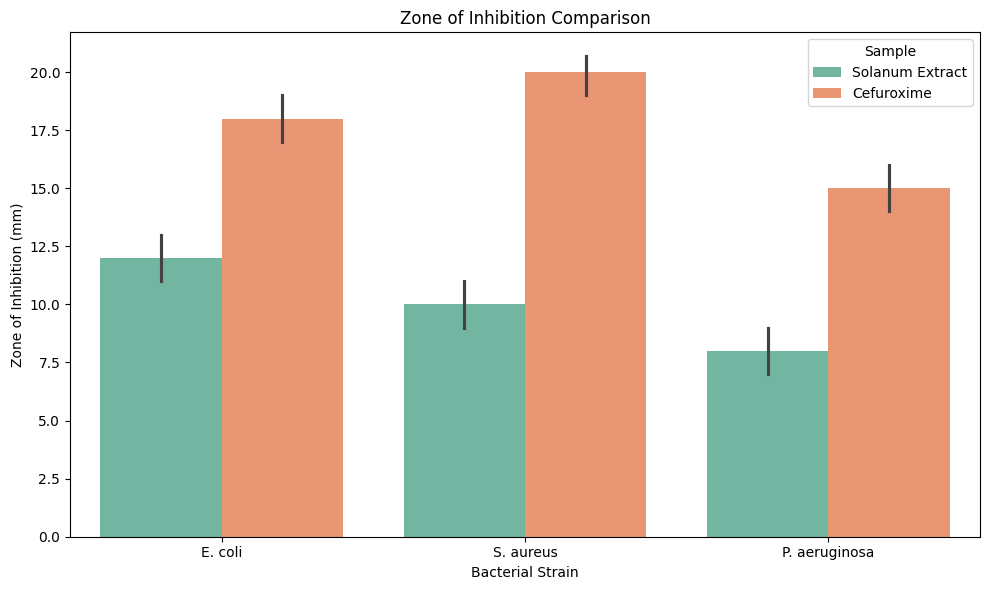

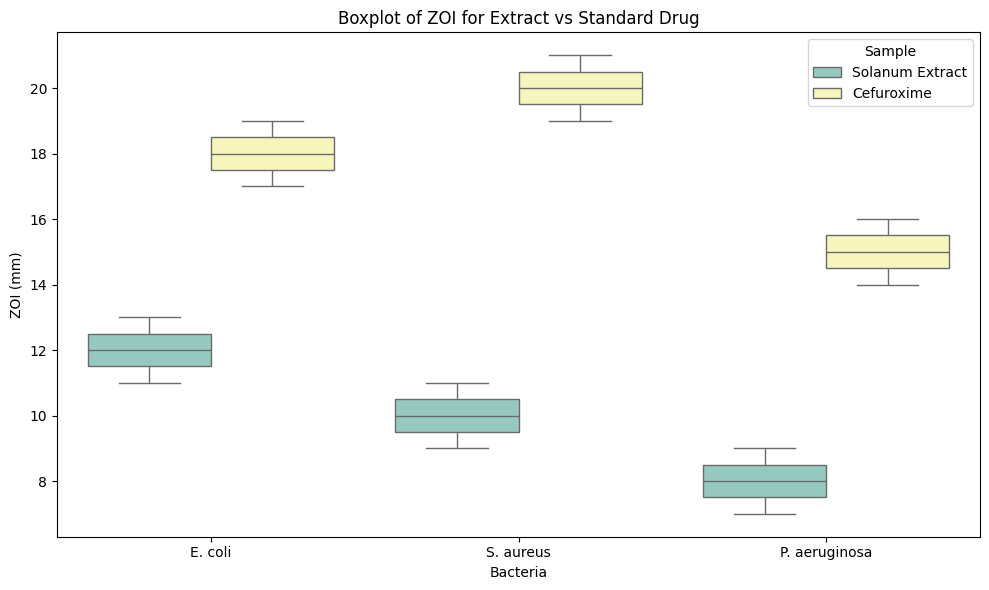

T-test for E. coli: p-value = 0.0018
T-test for S. aureus: p-value = 0.0003
T-test for P. aeruginosa: p-value = 0.0010


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Step 1: Load Data
data = pd.read_csv("/antimicrobial_data (1).csv")

# Step 2: View Data Summary
print(data.head())
print("\nData Summary:\n", data.groupby(['Sample', 'Bacteria'])['ZOI (mm)'].describe())

# Step 3: Plot Bar Chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Bacteria', y='ZOI (mm)', hue='Sample', palette='Set2')
plt.title('Zone of Inhibition Comparison')
plt.ylabel('Zone of Inhibition (mm)')
plt.xlabel('Bacterial Strain')
plt.legend(title='Sample')
plt.tight_layout()
plt.show()

# Step 4: Plot Boxplot for Statistical Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Bacteria', y='ZOI (mm)', hue='Sample', palette='Set3')
plt.title('Boxplot of ZOI for Extract vs Standard Drug')
plt.tight_layout()
plt.show()

# Step 5: Optional: Statistical Analysis (t-test)
bacteria_list = data['Bacteria'].unique()
for bacteria in bacteria_list:
    extract_zoi = data[(data['Bacteria'] == bacteria) & (data['Sample'] == 'Solanum Extract')]['ZOI (mm)']
    drug_zoi = data[(data['Bacteria'] == bacteria) & (data['Sample'] == 'Cefuroxime')]['ZOI (mm)']

    if len(extract_zoi) > 1 and len(drug_zoi) > 1:
        stat, pval = ttest_ind(extract_zoi, drug_zoi)
        print(f"T-test for {bacteria}: p-value = {pval:.4f}")
    else:
        print(f"Not enough replicates for t-test on {bacteria}")
